In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load the dataset
data = pd.read_csv('sales_data.csv')

# Data cleaning
data = data.dropna() # Remove missing values
data['order_date'] = pd.to_datetime(data['order_date']) # Convert date column to datetime format
data['year'] = data['order_date'].dt.year 
data['month'] = data['order_date'].dt.month 
data['day'] = data['order_date'].dt.day 
data['revenue'] = data['quantity'] * data['price'] 



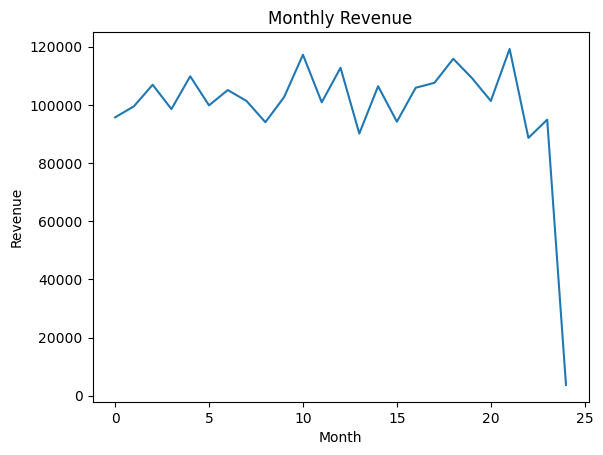

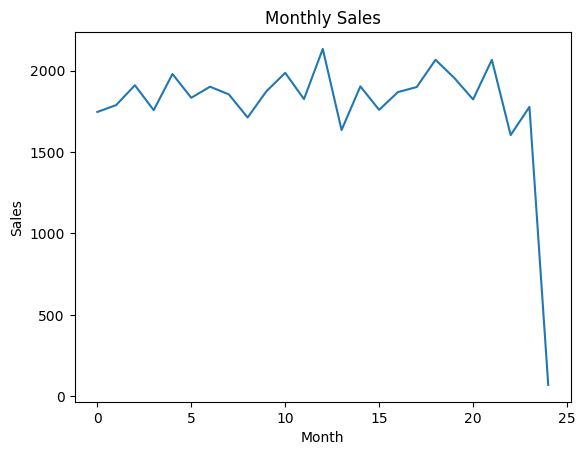

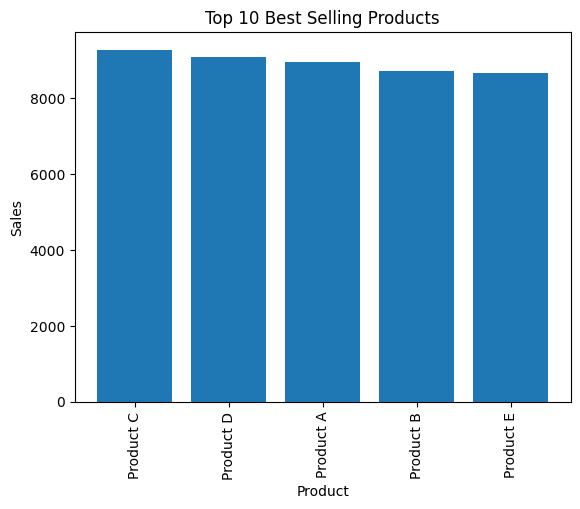

In [11]:
# Exploratory Data Analysis 
monthly_revenue = data.groupby(['year', 'month'])['revenue'].sum().reset_index()
plt.plot(monthly_revenue['revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.show()

monthly_sales = data.groupby(['year', 'month'])['quantity'].sum().reset_index()
plt.plot(monthly_sales['quantity'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

product_sales = data.groupby('product')['quantity'].sum().reset_index()
product_sales = product_sales.sort_values('quantity', ascending=False).head(10)
plt.bar(product_sales['product'], product_sales['quantity'])
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Top 10 Best Selling Products')
plt.show()

data['weekend'] = np.where(data['order_date'].dt.weekday.isin([5, 6]), 1, 0) # Create a binary variable indicating weekend orders


X = data[['year', 'month', 'day', 'weekend', 'price']]
y = data['revenue']


In [12]:
# Model development
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
print('R^2 score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Model deployment
new_data = pd.DataFrame({'year': [2022, 2022, 2022],
                         'month': [1, 2, 3],
                         'day': [1, 15, 31],
                         'weekend': [0, 1, 1],
                         'price': [10, 20, 30]})
new_revenue = model.predict(new_data)
print('New revenue predictions:', new_revenue)

R^2 score: 0.4094302398694599
Mean Absolute Error: 124.92861423561793
Mean Squared Error: 25698.918768156487
New revenue predictions: [ 42.30486073  94.54141166 146.83325743]
